In [56]:
%load_ext autoreload

from gridworld import GridWorld1
import RL
import gridrender as gui
import matplotlib.pyplot as plt
import numpy as np
import time
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
################################################################################
# Initialization
################################################################################

env = GridWorld1
n_states = env.n_states
n_actions = len(env.action_names)

model = RL.RL(env)


In [58]:
# Estimating initial state distribution
n_start = 10000
model.estimate_start_distribution(n_start)
print(f'Estimated start state distribution is {model.mu} after {n_start} throws')

# Tmax st the discounted truncated sum of rewards is delta-closed to the infinite sum
delta = 0.01
tmax = -int(np.log(delta)/(1-env.gamma))
print(f'Tmax (max number of iterations in an episode) is chosen as : {tmax}')


Estimated start state distribution is [ 0.1439  0.0954  0.0867  0.0462  0.0905  0.0914  0.0931  0.0846  0.0906
  0.0871  0.0905] after 10000 throws
Tmax (max number of iterations in an episode) is chosen as : 92


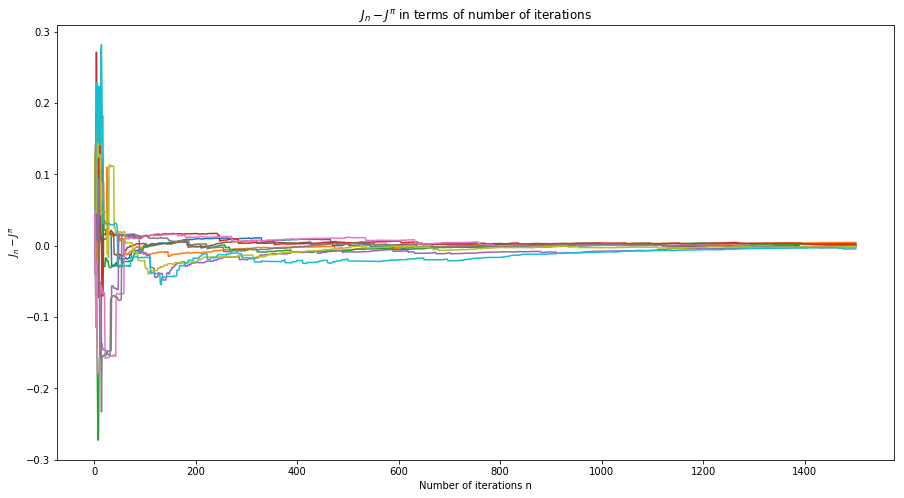

In [79]:
################################################################################
# Q4: Policy evaluation
################################################################################

# Deterministic policy: always go right when available, otherwise up
policy = np.zeros(n_states)
for i, el in enumerate(env.state_actions):
        if 0 in el:
                policy[i] = 0
        else:
                policy[i] = 3
model.set_policy(policy)

f, ax = plt.subplots(1, figsize= (15,8))

# Policy estimation using Monte-Carlo estimation on trajectories:
# one trajectory = one sample for initial state
for i in range(10):
        model.estimate_value_MC(1500, tmax)

        v_q4 = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 
                         0.67106071, -0.99447514, 0.00000000, -0.82847001, 
                         -0.87691855, -0.93358351, -0.99447514])
        model.plot_avg_value_approximation(v_q4, ax = ax)

        
        
plt.show()


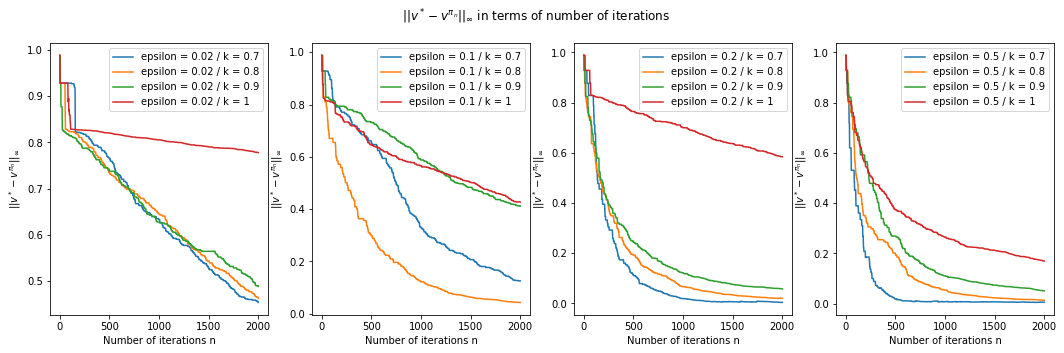

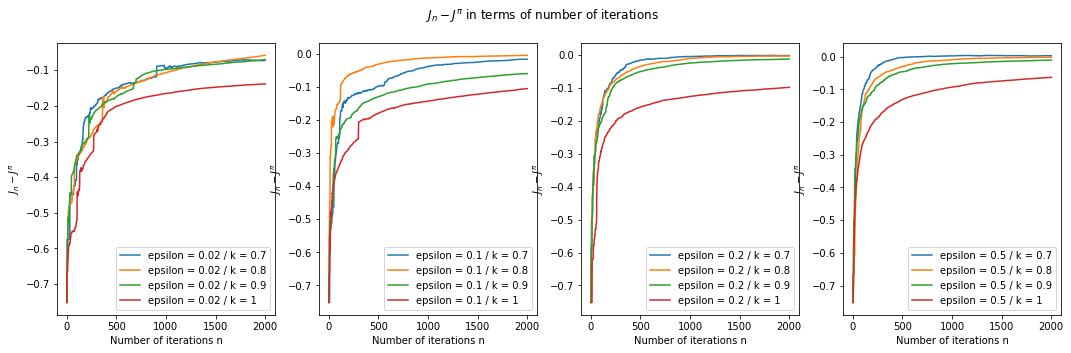

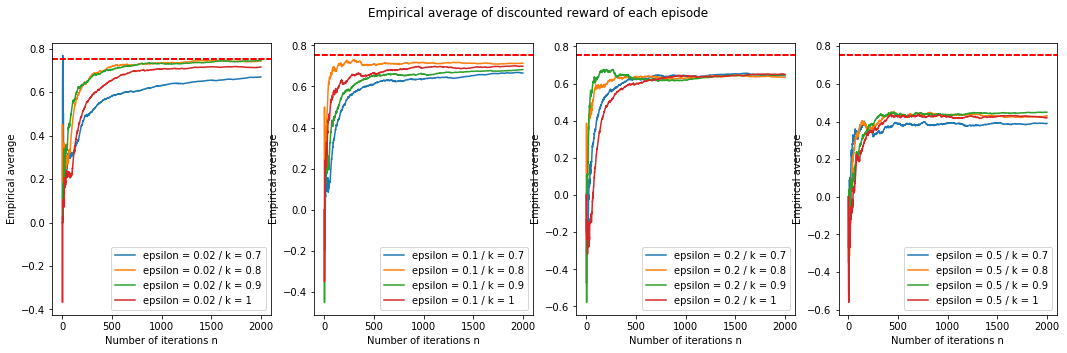

In [87]:
################################################################################
# Q5: Policy optimization
################################################################################
ks = [0.7, 0.8, 0.9, 1]
epss = [0.02, 0.1, 0.2, 0.5]
f1, ax1 = plt.subplots(1,len(epss), figsize = (18,5))
f2, ax2 = plt.subplots(1,len(epss), figsize = (18,5))
f3, ax3 = plt.subplots(1, len(epss), figsize = (18,5))

v_opt = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 
                  0.92820033, 0.00000000, 0.77818504, 0.82369294, 0.87691855, 
                  0.82847001])

for k in ks:
    for i,eps in enumerate(epss):
        alpha = lambda x: 1/(x**k)
        learning_rates = np.full((n_states, n_actions), alpha)
        model.learn_q(2000, tmax, eps, learning_rates)

        label = f'epsilon = {eps} / k = {k}'
        model.plot_value_error(v_opt, label = label, ax = ax1[i])
        model.plot_avg_value_approximation(v_opt, label = label, ax = ax2[i])
        model.plot_reward(discounted = True, yline = model.avg_value_infty, \
                          label = label, ax = ax3[i])


for i in range(len(epss)):
    ax1[i].set_title('')
    ax2[i].set_title('')
    ax3[i].set_title('')
    
f1.suptitle(r'$||v^* - v^{\pi_n}||_{\infty}$ in terms of number of iterations')
f2.suptitle(r'$J_n - J^\pi$ in terms of number of iterations')    
f3.suptitle('Empirical average of discounted reward of each episode')
plt.show()

In [90]:
# Optimal policy render
alpha = lambda x: 1 / (x ** 0.7)
learning_rates = np.full((n_states, n_actions), alpha)
model.learn_q(10000, tmax, 0.2, learning_rates)

pol = model.policy_n[:,-1]
gui.render_policy(env, pol)

q_formatted = [model.Q_n[state, :, -1][model.Q_n[state, :, -1] != -np.inf] \
               for state in range(n_states)]
gui.render_q(env, q_formatted)
